#### Predicting Mortality of Heart Failure Patients with ML
+ This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.


#### Data Source
+ https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

In [1]:
# Load EDA Pkgs
import pandas as pd 
import numpy as np

In [2]:
# Load Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Cleaning & Prep

In [3]:
# Load Dataset
df = pd.read_csv("data/preprocess/heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# Column Consistency
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

In [9]:
# Rename Column
df.rename(columns={'death_event':'target'},inplace=True)

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'target'],
      dtype='object')

In [11]:
# Check Missing Values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
target                      0
dtype: int64

In [12]:
# Data Types
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
target                        int64
dtype: object

In [13]:
# Descriptive Stats
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [14]:
# Data Viz
#0/Lives 1/Deceased
# Value Counts
df['target'].value_counts()

0    203
1     96
Name: target, dtype: int64

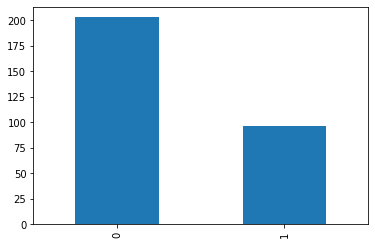

In [15]:
df['target'].value_counts().plot(kind='bar')

In [16]:
# Value Count for Gender
# Female (0)/ Male(1)
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

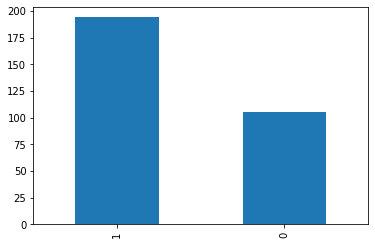

In [17]:
# Value Count for Gender
df['sex'].value_counts().plot(kind='bar')

In [18]:
# Age & Sex
df.groupby(['age','sex']).size()


age   sex
40.0  0      2
      1      5
41.0  1      1
42.0  0      2
      1      5
            ..
90.0  0      1
      1      2
94.0  1      1
95.0  0      1
      1      1
Length: 79, dtype: int64

In [19]:
# Freq Distribution Table
df['age'].min()

40.0

In [20]:
df['age'].max()

95.0

In [23]:
labels = ["less than 40","40-50","50-60","60-70","70-80","80-90","90 and more"]
bins = [0,40,50,60,70,80,90,100]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()

In [24]:
freq_df

age
less than 40     7
40-50           67
50-60           88
60-70           85
70-80           34
80-90           15
90 and more      3
dtype: int64

In [25]:
freq_df = freq_df.reset_index(name='count')

In [26]:
freq_df

,age,count
0,less than 40,7
1,40-50,67
2,50-60,88
3,60-70,85
4,70-80,34
5,80-90,15
6,90 and more,3


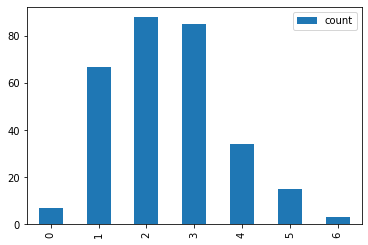

In [27]:
# Age Range with the most heart failure
freq_df.plot(kind='bar')

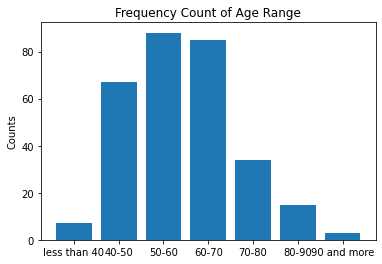

In [28]:
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title("Frequency Count of Age Range")
plt.show()

### Narrative
+ Most patient that have the heart failure are within the range of 40 - 79

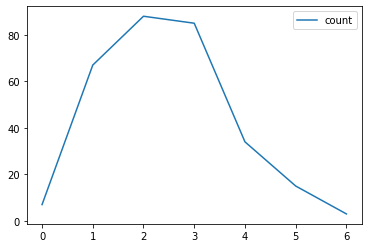

In [29]:
freq_df.plot(kind='line')

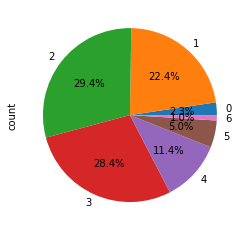

In [30]:
# Pie Chart
freq_df['count'].plot.pie(autopct="%1.1f%%")

### Detection of Outliers
+ Single Column/Variable(Univariate)
    - Boxplot
+ Multiple Columns/Variable(Multivariate)
    - scatterplot
    - z1 score
    -iqr
    
    

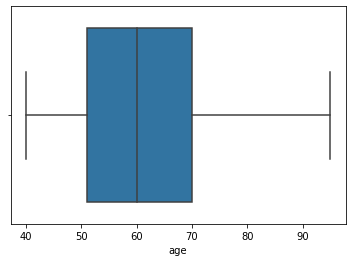

In [31]:
# Single Column Outlier using Boxplot
sns.boxplot(df['age'])

In [32]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'target'],
      dtype='object')

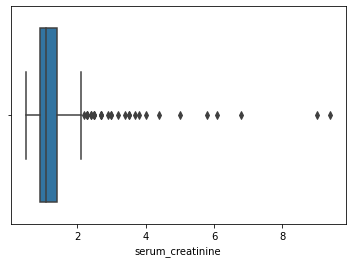

In [35]:
# Single Column Outlier using Boxplot
sns.boxplot(df['serum_creatinine'])

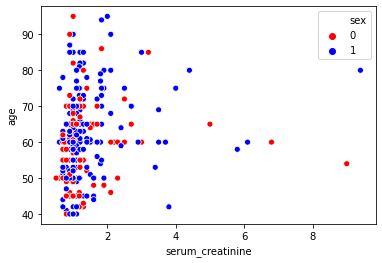

In [37]:
# Scatter plot for multiple
sns.scatterplot(x=df['serum_creatinine'],y=df['age'],hue=df['sex'],palette=['red','blue'],data=df)

#### Interquartile Range(IGQ)
IQR = q3(75) - q1(25)

In [38]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [39]:
IQR = q3-q1

In [40]:
IQR

age                            19.0
anaemia                         1.0
creatinine_phosphokinase      465.5
diabetes                        1.0
ejection_fraction              15.0
high_blood_pressure             1.0
platelets                   91000.0
serum_creatinine                0.5
serum_sodium                    6.0
sex                             1.0
smoking                         1.0
time                          130.0
target                          1.0
dtype: float64

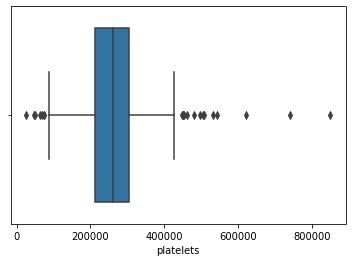

In [41]:
sns.boxplot(df['platelets'])

In [44]:
(df < (q1 - 1.5 *IQR)) | (df > (q3 + 1.5 * IQR))

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,True,False,False,False,False,False,False,False,False,False,False
296,False,False,True,False,False,False,True,False,False,False,False,False,False
297,False,False,True,False,False,False,False,False,False,False,False,False,False


In [46]:
df_no_outlier = df[~((df < (q1 - 1.5 *IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]

In [47]:
print("Initial",df.shape)
print("No Outlier",df_no_outlier.shape)

Initial (299, 13)
No Outlier (224, 13)


In [48]:
df2 = df_no_outlier

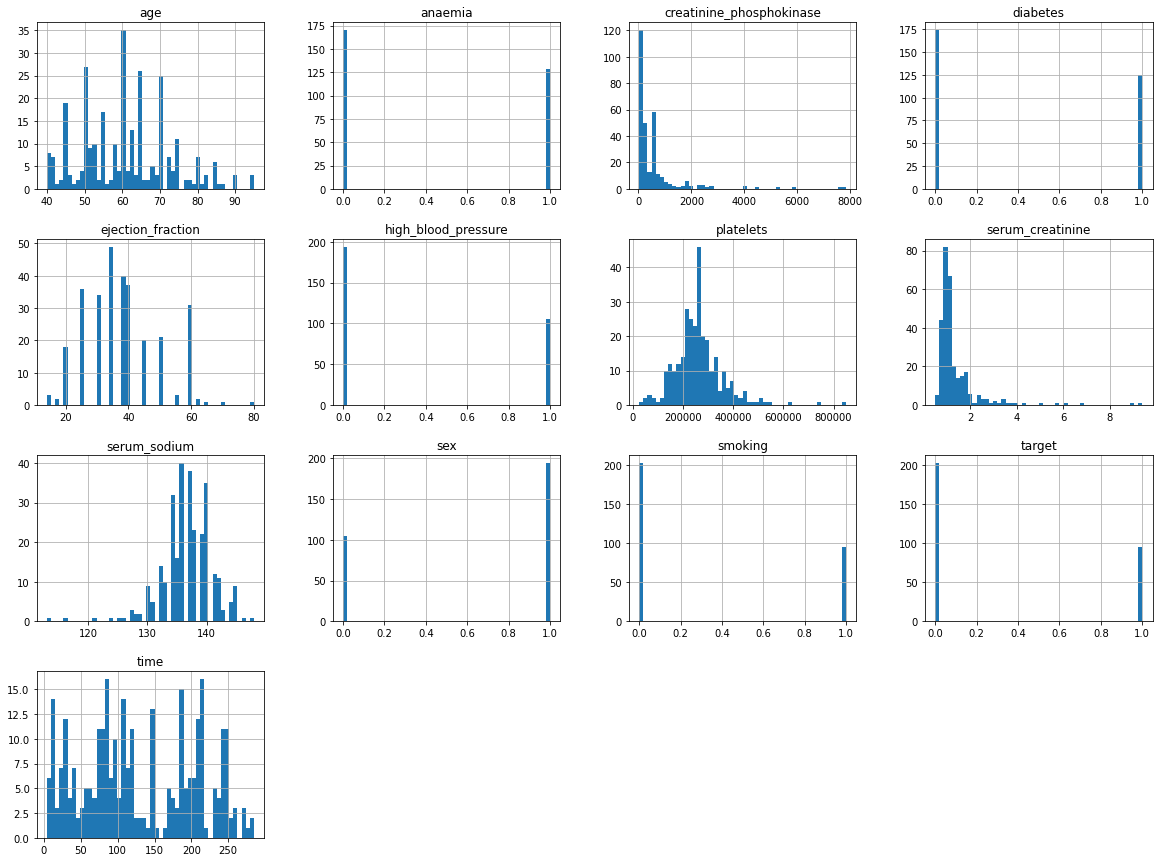

In [50]:
# Hist Plot
df.hist(bins=50,figsize=(20,15))
plt.show()

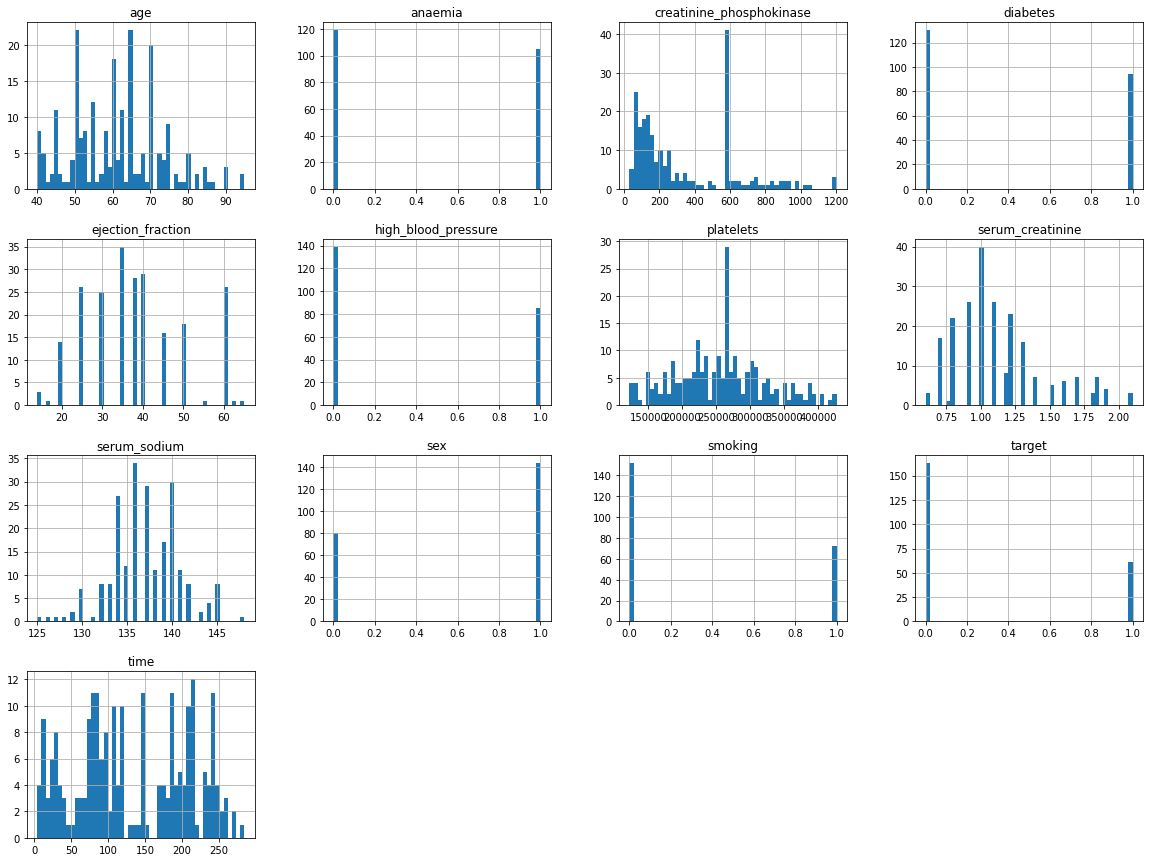

In [51]:
df_no_outlier.hist(bins=50,figsize=(20,15))
plt.show()

In [53]:
### Clean Data Storage
df_no_outlier.to_csv("clean_data_heart_failure_no_outier_202006_20_13.csv")

### Features Selection

+ Best Features
+ Most important features that influence our target the most

+ SelectKbest
+ ExtraTreeClassifier
+ RFE

In [55]:
# Load ML Pkgs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [58]:
# Features
xfeatures = df2[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
ylabels = df2['target']

In [59]:
df2.shape

(224, 13)

In [60]:
# Init
skb = SelectKBest(score_func=chi2,k=10)

In [61]:
# Fit
best_fit = skb.fit(xfeatures,ylabels)

In [62]:
# Highest score are the best 
best_fit.scores_

array([4.16475490e+01, 5.57625130e-01, 1.23219902e+02, 1.37126301e-01,
       7.47393727e+01, 8.81221788e-01, 1.71168524e+04, 2.57931369e+00,
       3.00051881e-01, 1.11748075e-01, 4.01309687e-01, 2.54322802e+03])

In [63]:
# Create A DF
feature_scores = pd.DataFrame(best_fit.scores_,columns=['Feature_Score'])

In [64]:
feature_scores

,Feature_Score
0,41.647549
1,0.557625
2,123.219902
3,0.137126
4,74.739373
5,0.881222
6,17116.852432
7,2.579314
8,0.300052
9,0.111748


In [65]:
feature_columns = pd.DataFrame(xfeatures.columns,columns=['Feature_Name'])

In [66]:
best_features_df = pd.concat([feature_columns,feature_scores],axis=1)

In [67]:
best_features_df

,Feature_Name,Feature_Score
0,age,41.647549
1,anaemia,0.557625
2,creatinine_phosphokinase,123.219902
3,diabetes,0.137126
4,ejection_fraction,74.739373
5,high_blood_pressure,0.881222
6,platelets,17116.852432
7,serum_creatinine,2.579314
8,serum_sodium,0.300052
9,sex,0.111748


In [68]:
# Find the best 10 features
best_features_df.nlargest(10,'Feature_Score')

,Feature_Name,Feature_Score
6,platelets,17116.852432
11,time,2543.228022
2,creatinine_phosphokinase,123.219902
4,ejection_fraction,74.739373
0,age,41.647549
7,serum_creatinine,2.579314
5,high_blood_pressure,0.881222
1,anaemia,0.557625
10,smoking,0.401310
8,serum_sodium,0.300052


In [69]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'target'],
      dtype='object')

In [71]:
### Feature Importance Using ETClf
from sklearn.ensemble import ExtraTreesClassifier

In [72]:
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures,ylabels)

ExtraTreesClassifier()

In [75]:
print(et_clf.feature_importances_)

[0.11073723 0.03268115 0.07424101 0.02942912 0.14032797 0.02783742
 0.07127579 0.12162961 0.06630633 0.02712044 0.02827165 0.27014229]


In [76]:
ft_importance = pd.Series(et_clf.feature_importances_,index=xfeatures.columns)

In [77]:
ft_importance

age                         0.110737
anaemia                     0.032681
creatinine_phosphokinase    0.074241
diabetes                    0.029429
ejection_fraction           0.140328
high_blood_pressure         0.027837
platelets                   0.071276
serum_creatinine            0.121630
serum_sodium                0.066306
sex                         0.027120
smoking                     0.028272
time                        0.270142
dtype: float64

In [79]:
ft_importance.nlargest(10)

time                        0.270142
ejection_fraction           0.140328
serum_creatinine            0.121630
age                         0.110737
creatinine_phosphokinase    0.074241
platelets                   0.071276
serum_sodium                0.066306
anaemia                     0.032681
diabetes                    0.029429
smoking                     0.028272
dtype: float64

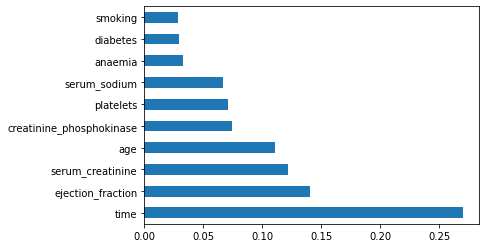

In [80]:
ft_importance.nlargest(10).plot(kind='barh')

### Narrative
+ Diabetes,Smoking,Sex can also be added as risk factors
+ The rest are actually important (platelets,CK,SC,EF)

In [81]:
### Feature Correlation
df2.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
age,1.000000,0.053539,0.029417,-0.035489,0.085668,0.122613,-0.090753,0.277358,-0.024793,0.031341,-0.003437,-0.227897,0.282100
anaemia,0.053539,1.000000,-0.204293,-0.019261,-0.011293,0.021316,0.016587,-0.005744,0.073751,-0.102687,-0.148455,-0.084116,0.068454
creatinine_phosphokinase,0.029417,-0.204293,1.000000,0.000761,-0.124547,-0.014055,0.027437,0.119707,-0.121298,-0.058015,-0.058020,0.119300,0.048815
diabetes,-0.035489,-0.019261,0.000761,1.000000,0.026488,0.062085,-0.013930,-0.005966,-0.131460,-0.140246,-0.120369,0.061295,-0.032478
ejection_fraction,0.085668,-0.011293,-0.124547,0.026488,1.000000,0.058123,0.083675,-0.197565,0.169013,-0.122567,-0.084964,0.058918,-0.305454
high_blood_pressure,0.122613,0.021316,-0.014055,0.062085,0.058123,1.000000,0.083800,-0.047779,0.019875,-0.108344,-0.065429,-0.231826,0.079622
platelets,-0.090753,0.016587,0.027437,-0.013930,0.083675,0.083800,1.000000,-0.033240,0.008382,-0.132695,-0.028553,0.037306,-0.065993
serum_creatinine,0.277358,-0.005744,0.119707,-0.005966,-0.197565,-0.047779,-0.033240,1.000000,-0.216217,0.146300,-0.025052,-0.111504,0.348548
serum_sodium,-0.024793,0.073751,-0.121298,-0.131460,0.169013,0.019875,0.008382,-0.216217,1.000000,-0.050111,0.042244,0.027019,-0.112804
sex,0.031341,-0.102687,-0.058015,-0.140246,-0.122567,-0.108344,-0.132695,0.146300,-0.050111,1.000000,0.473090,0.018674,0.037374


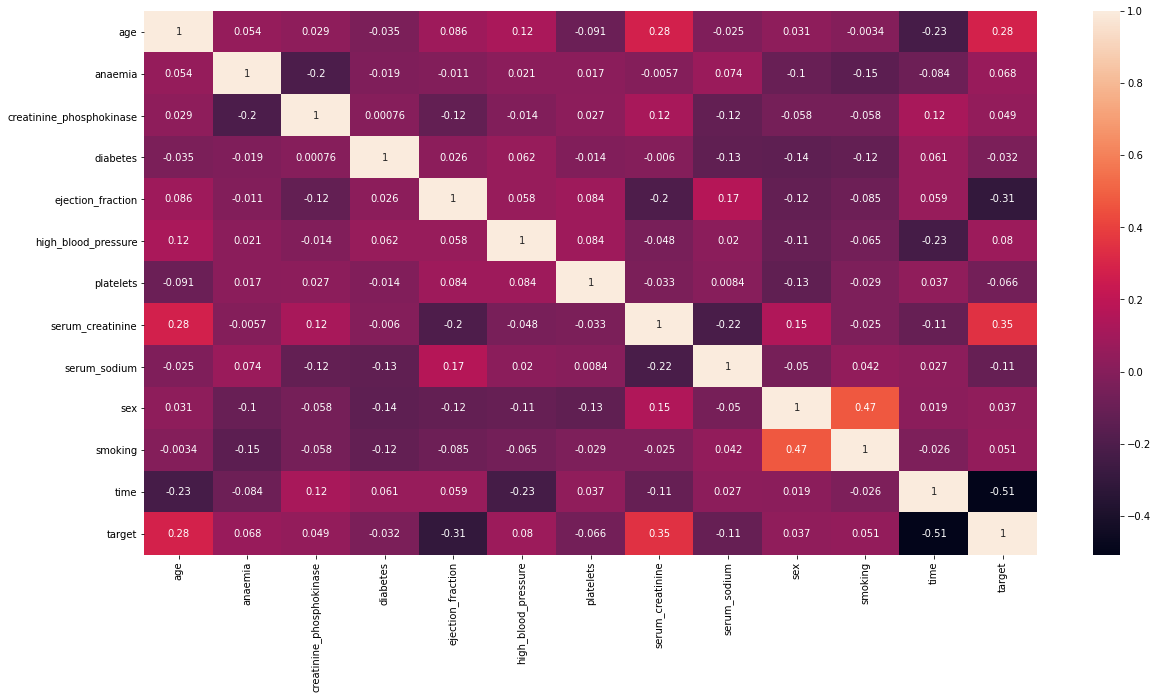

In [83]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()

### Model Building
+ Logistic Regression
+ KNN
+ Decision Trees

In [84]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [85]:
# Load Metric/Train/testsplit
from sklearn.metrics import accuracy_score
from  sklearn.model_selection import train_test_split

In [87]:
xfeatures.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [89]:
ylabels.unique()

array([1, 0])

In [90]:
# Split our dataset
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels,test_size=0.30,random_state=7)

In [91]:
x_train.shape

(156, 12)

In [92]:
xfeatures.shape

(224, 12)

In [93]:
# Init Model
logreg_model = LogisticRegression()
logreg_model.fit(x_train,y_train)

/home/rooot/.local/share/virtualenvs/data-science-projects-PhMxvIYp/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [94]:
# Prediction
logreg_model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1])

In [97]:
print(list(y_test))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]


In [98]:
# Accuracy of Model
logreg_model.score(x_test,y_test)

0.7647058823529411

In [100]:
# Method 2
accuracy_score(y_test,logreg_model.predict(x_test))

0.7647058823529411

In [115]:
x1 = x_test.iloc[2]

In [116]:
# Reshape
logreg_model.predict(np.array(x1).reshape(1,-1))

array([0])

In [106]:
res_dict = {"Alive":0,"Deceased":1}

In [107]:
# Alternative Algorithm
knn = KNeighborsClassifier(n_neighbors=4)

In [108]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [109]:
# Accuracy
knn.score(x_test,y_test)

0.7205882352941176

In [117]:
knn.predict(np.array(x1).reshape(1,-1))

array([0])

### Model Interpretation
+ Lime
+ Eli5
+ SHAP
+ Skater


In [119]:
import lime
import lime.lime_tabular

In [112]:
xfeatures.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [113]:
feature_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

In [114]:
class_names = ["Alive(0)","Deceased(1)"]

In [120]:
# Create our explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values,feature_names=feature_names,class_names=class_names,discretize_continuous=True)

In [121]:
xfeatures.shape

(224, 12)

In [122]:
# Explainer instance
exp = explainer.explain_instance(x_test.iloc[2],logreg_model.predict_proba,num_features=12,top_labels=1)

In [123]:
exp.show_in_notebook(show_table=True,show_all=False)

In [124]:
### Using ELi5
import eli5

/home/rooot/.local/share/virtualenvs/data-science-projects-PhMxvIYp/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/rooot/.local/share/virtualenvs/data-science-projects-PhMxvIYp/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [125]:
eli5.show_weights(logreg_model,feature_names=feature_names,target_names=class_names)

Weight?,Feature
+0.054,age
+0.009,serum_sodium
+0.003,serum_creatinine
+0.002,anaemia
+0.000,<BIAS>
+0.000,sex
+0.000,platelets
-0.000,diabetes
-0.000,high_blood_pressure
-0.000,smoking


In [126]:
# Explaining a single sample
eli5.show_prediction(logreg_model,x_test.iloc[2],feature_names=feature_names,target_names=class_names)

### Evaluation
+ Confusion
+ Classification report


In [127]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

![](confusionmatrix_image.jpg)

In [128]:
# Prediction
y_pred = logreg_model.predict(x_test)

In [129]:
confusion_matrix(y_test,y_pred)

array([[41,  7],
       [ 9, 11]])

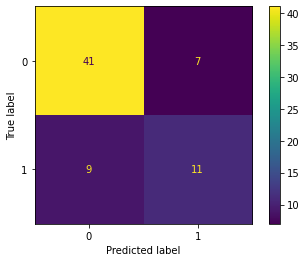

In [130]:
# Plot of CM
plot_confusion_matrix(logreg_model,x_test,y_test)
plt.show()

![](cm_f1_score.png)

In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        48
           1       0.61      0.55      0.58        20

    accuracy                           0.76        68
   macro avg       0.72      0.70      0.71        68
weighted avg       0.76      0.76      0.76        68



In [132]:
print(classification_report(y_test,y_pred,target_names=class_names))

              precision    recall  f1-score   support

    Alive(0)       0.82      0.85      0.84        48
 Deceased(1)       0.61      0.55      0.58        20

    accuracy                           0.76        68
   macro avg       0.72      0.70      0.71        68
weighted avg       0.76      0.76      0.76        68



### Serialization
+ Saving
+ Numpy
+ Joblib
+ Pickle
+ JSON/CSV
+ Ray

In [133]:
import joblib

In [134]:
model_file = open("logistic_regression_hf_model.pkl","wb")
joblib.dump(logreg_model,model_file)
model_file.close()

In [135]:
knn_model_file = open("knn_hf_model.pkl","wb")
joblib.dump(knn,knn_model_file)
knn_model_file.close()

In [ ]:
### Thanks For Watching
# Jesus Saves @JCharisTech
# By Jesse E.Agbe(JCharis)